# Data Wrangling Demo

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np

### Obtain Data

In [40]:
table = pd.read_csv("http://www.simbrain.net/misc/movies_uncleaned.csv", header=-1)

### Clean Data

In [41]:
table.columns = ([ "Budget", "Profit", "Average review",
                                "Average age of viewer", "Number of Views", "Film-rating"])

In [42]:
table = table.drop(table.index[3]) 

In [43]:
table.head(5)

,Budget,Profit,Average review,Average age of viewer,Number of Views,Film-rating
0,77000000.0,610000.0,9.200000,60.0,6700.0,PG-13
1,63000000.0,720000.0,NaN,65.0,7200.0,R
2,69000000.0,610000.0,9.466667,67.0,6900.0,PG
4,64000000.0,720000.0,8.666667,65.0,7300.0,PG-13
5,77000000.0,610000.0,NaN,60.0,7100.0,G


In [44]:
table = table.fillna(table.mean())

### Impute Data

In [45]:
table.head(10)

,Budget,Profit,Average review,Average age of viewer,Number of Views,Film-rating
0,77000000.0,610000.000000,9.200000,60.0,6700.0,PG-13
1,63000000.0,720000.000000,8.973196,65.0,7200.0,R
2,69000000.0,610000.000000,9.466667,67.0,6900.0,PG
4,64000000.0,720000.000000,8.666667,65.0,7300.0,PG-13
5,77000000.0,610000.000000,8.973196,60.0,7100.0,G
6,63000000.0,740000.000000,8.800000,64.0,7200.0,PG
7,61000000.0,655102.040816,8.533333,75.0,7800.0,PG
8,63000000.0,690000.000000,8.533333,75.0,7700.0,R
9,75000000.0,600000.000000,9.200000,62.0,6800.0,G
10,76000000.0,590000.000000,8.933333,62.0,6700.0,R


### Feature Coding

In [46]:
table = pd.get_dummies(table, columns=['Film-rating'])

In [47]:
table.head(10)

,Budget,Profit,Average review,Average age of viewer,Number of Views,Film-rating_G,Film-rating_PG,Film-rating_PG-13,Film-rating_R
0,77000000.0,610000.000000,9.200000,60.0,6700.0,0,0,1,0
1,63000000.0,720000.000000,8.973196,65.0,7200.0,0,0,0,1
2,69000000.0,610000.000000,9.466667,67.0,6900.0,0,1,0,0
4,64000000.0,720000.000000,8.666667,65.0,7300.0,0,0,1,0
5,77000000.0,610000.000000,8.973196,60.0,7100.0,1,0,0,0
6,63000000.0,740000.000000,8.800000,64.0,7200.0,0,1,0,0
7,61000000.0,655102.040816,8.533333,75.0,7800.0,0,1,0,0
8,63000000.0,690000.000000,8.533333,75.0,7700.0,0,0,0,1
9,75000000.0,600000.000000,9.200000,62.0,6800.0,1,0,0,0
10,76000000.0,590000.000000,8.933333,62.0,6700.0,0,0,0,1


### Rescaling

In [ ]:
scaler = preprocessing.StandardScaler()
columns_to_rescale = ["Budget", "Profit", "Average review", "Average age of viewer", 
                      "Number of Views"]
table[columns_to_rescale] = scaler.fit_transform(table[columns_to_rescale])

In [ ]:
table.head()

In [48]:
table.to_csv("table.csv", header=False, index=False)

### Export File

In [33]:
table.round(2).head(10)

,Budget,Profit,Average review,Average age of viewer,Number of Views,Film-rating_G,Film-rating_PG,Film-rating_PG-13,Film-rating_R
0,1.69,-0.84,0.57,-1.34,-1.09,0,0,1,0
1,-0.82,1.21,0.00,-0.41,0.26,0,0,0,1
2,0.25,-0.84,1.23,-0.03,-0.55,0,1,0,0
4,-0.64,1.21,-0.76,-0.41,0.53,0,0,1,0
5,1.69,-0.84,0.00,-1.34,-0.01,1,0,0,0
6,-0.82,1.59,-0.43,-0.59,0.26,0,1,0,0
7,-1.18,0.00,-1.10,1.47,1.87,0,1,0,0
8,-0.82,0.65,-1.10,1.47,1.60,0,0,0,1
9,1.33,-1.03,0.57,-0.97,-0.82,1,0,0,0
10,1.51,-1.22,-0.10,-0.97,-1.09,0,0,0,1


In [34]:
output_dataset = pd.DataFrame([[.01,.9],[.7,.2],[.1,.1]], 
   columns = ['Probability Child Will View', 'Probability Adult Will View'])

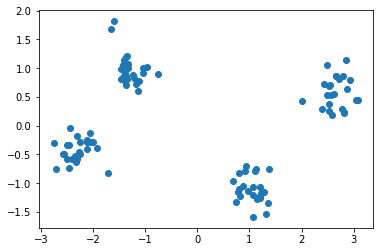

In [35]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
projection = pca.fit_transform(table)
plt.scatter(projection[:,0],projection[:,1])

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
table = pd.read_csv("table.csv")

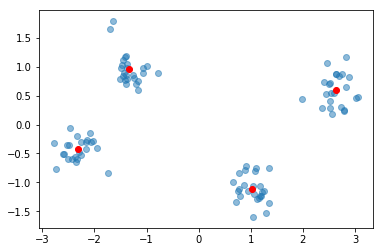

In [37]:
pca = PCA(n_components=2)
projection = pca.fit_transform(table)
kmeans = KMeans(n_clusters=4).fit(projection)   # Edit number of clusters
clusters = kmeans.cluster_centers_
plt.scatter(projection[:,0],projection[:,1], alpha = .5);
plt.scatter(clusters[:,0],clusters[:,1],  color="r");